In [2]:
import pandas as pd
import numpy as np

df_dev = pd.read_csv("./proc/development.csv").set_index("Id")
df_eval = pd.read_csv("./proc/evaluation.csv").set_index("Id")

In [3]:
df_dev.head()   

,age,gender,mean_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,igbo,standard_sentence
Id,,,,,,,,,,,,,,,,
0,24.0,0,1821.6906,0.013795,0.082725,-6.095135,0.210093,3112.257251,151.999081,-123.999726,69,281,39,23.846893,0,1
1,22.5,0,1297.8187,0.025349,0.096242,-4.851245,0.078849,1688.016389,129.199219,-86.928478,69,281,21,19.388662,0,1
2,22.0,0,1332.8524,0.019067,0.119456,-5.817753,0.105365,2576.901706,117.453835,-98.450670,69,281,1,21.640998,0,1
3,22.0,0,1430.3499,0.017004,0.102389,-3.800010,0.173701,3269.751413,117.453835,-56.459762,69,281,9,19.644127,0,1
4,22.0,1,1688.7234,0.028027,0.124831,-5.227183,0.107279,1930.897375,112.347147,-80.349204,69,281,11,18.041905,0,1


C:\Users\lucad\AppData\Local\Temp\ipykernel_512\4025982282.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(features, rotation=90)
C:\Users\lucad\AppData\Local\Temp\ipykernel_512\4025982282.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(features, rotation=90)


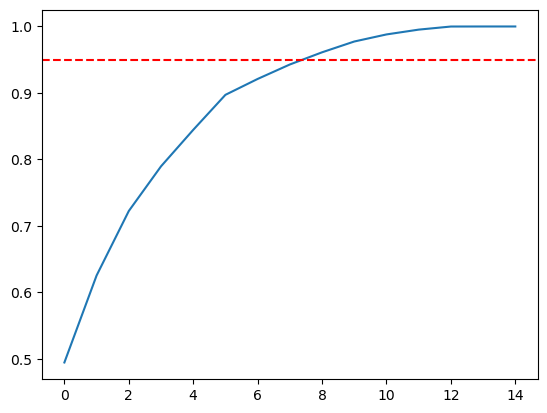

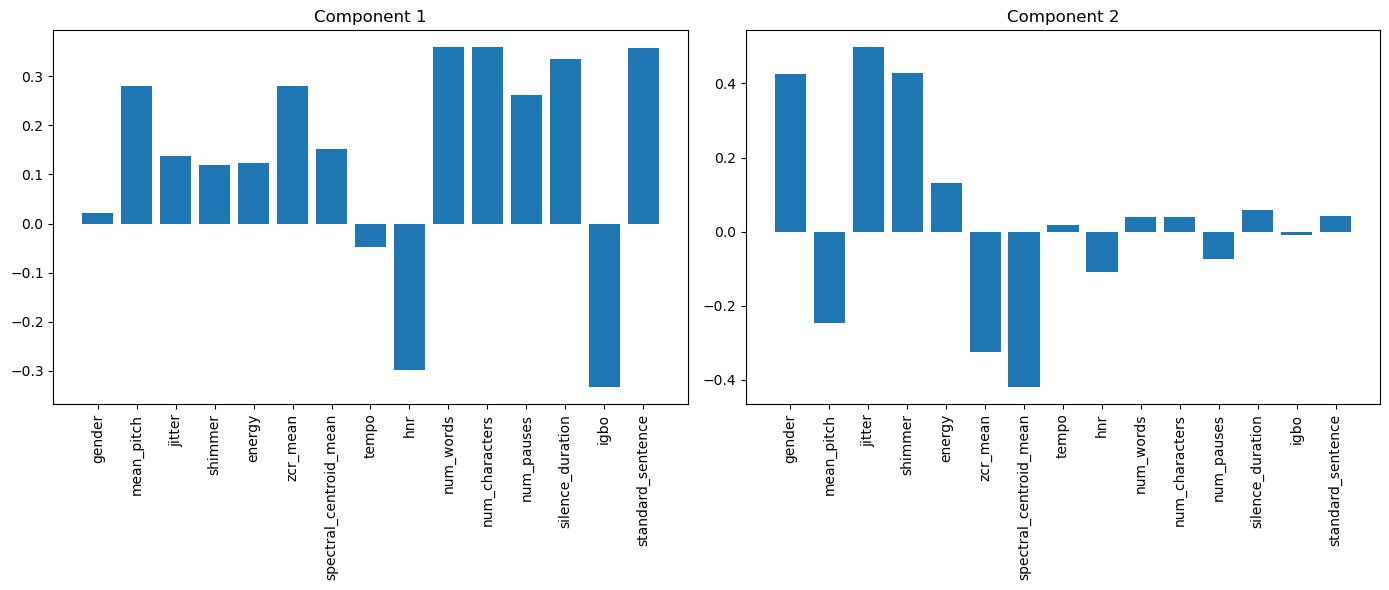

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_dev = df_dev.drop(columns=["age"]) 
y_dev = df_dev["age"]

ss = StandardScaler()
X_dev = ss.fit_transform(X_dev)

pca = PCA()
pca.fit(X_dev)  

import matplotlib.pyplot as plt 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.95, color="red", linestyle="--")

# Plotting the feature importances for the first two principal components
components = pca.components_[:2]
features = df_dev.drop(columns=["age"]).columns

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for i in range(2):
    ax[i].bar(features, components[i])
    ax[i].set_title(f'Component {i+1}')
    ax[i].set_xticklabels(features, rotation=90)
plt.tight_layout()
plt.show()

In [11]:

# Calcolare la correlazione delle principal components con la variabile 'age'
principal_components = pca.transform(X_dev)
df_pca = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
df_pca['age'] = y_dev.values

spearman_corr_pca = df_pca.corr(method='spearman')['age']
print(spearman_corr_pca)

PC1     0.532027
PC2     0.172013
PC3     0.077773
PC4     0.033551
PC5    -0.086965
PC6    -0.079555
PC7     0.007164
PC8     0.020044
PC9    -0.014709
PC10    0.028043
PC11   -0.184188
PC12    0.026187
PC13    0.081427
PC14   -0.011071
PC15    0.089949
age     1.000000
Name: age, dtype: float64


In [18]:
principal_components.shape

(2933, 15)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score 

ridge = Ridge()
scores = cross_val_score(ridge, principal_components[:,:8], y_dev, cv=5, scoring='neg_root_mean_squared_error')   
print(f"Mean MAE: {scores.mean()}")

Mean MAE: -11.116658141942022


: 